> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>

# Dataset Description

*Introduction:*
We have a dataset from Brazil's public health system that contains information about medical appointments. It tells us whether patients showed up for their scheduled appointments. By examining this data, we aim to uncover patterns and factors that influence patient attendance.

Column Names and Their Significance:

1. PatientId:
   - This is a unique number assigned to each patient. It helps us identify individual patients and track their appointment history.

2. AppointmentID:
   - This unique number is assigned to each appointment. It helps distinguish between different appointment records.

3. Gender:
   - Indicates whether the patient is male ('M') or female ('F'). This helps us analyze attendance patterns based on gender.

4. ScheduledDay:
   - This shows the date and time when the appointment was scheduled. It’s important for analyzing how the time between scheduling and the actual appointment might affect attendance.

5. AppointmentDay:
   - This is the date and time when the appointment is supposed to happen. Comparing this with the scheduled date can reveal patterns in appointment attendance.

6. Age:
   - Shows the patient’s age. Age can be a significant factor in understanding trends, like which age groups are more likely to miss appointments.

7. Neighbourhood:
   - Indicates the area where the hospital or clinic is located. Analyzing different neighborhoods can help us see if some areas have higher no-show rates.

8. Scholarship:
   - This column tells us if the patient is part of the Bolsa Família program, a social welfare program in Brazil. It’s a yes (1) or no (0) indicator. This information can help us understand the impact of socioeconomic status on appointment attendance.

9. Hipertension:
   - Shows if the patient has hypertension (high blood pressure). It’s a yes (1) or no (0) indicator. This helps us understand how chronic conditions might affect attendance.

10. Diabetes:
    - Indicates if the patient has diabetes. It’s also a yes (1) or no (0) indicator. Like hypertension, it helps us see the impact of chronic diseases on keeping appointments.

11. Alcoholism:
    - Tells us if the patient has a history of alcoholism. It’s a yes (1) or no (0) indicator. Alcoholism might affect a patient's reliability in attending appointments.

12. Handcap:
    - Indicates if the patient is handicapped, with values ranging from 0 (no) to 1-4 (different degrees of handicap). Physical disabilities might impact a patient’s ability to attend appointments.

13. SMS_received:
    - This column shows if the patient received an SMS reminder about their appointment. It’s a yes (1) or no (0) indicator. Reminders can be crucial in improving attendance rates.

14. No-show:
    - Indicates whether the patient showed up for the appointment. ‘No’ means they showed up, and ‘Yes’ means they did not. This is the key variable we’re interested in analyzing to understand what leads to no-shows.




# Questions for Analysis

In this analysis, we aim to explore the factors that influence whether a patient shows up for their scheduled medical appointment. We will focus on understanding the relationship between the no-show status and various independent variables.

*Key Questions:*

1. *How does age affect the likelihood of a no-show?*
   - We'll investigate if certain age groups are more prone to missing their appointments.


2. *What is the impact of receiving an SMS reminder on attendance?*
   - We will analyze whether receiving an SMS reminder helps reduce the number of no-shows.

3. *How do chronic conditions such as hypertension and diabetes affect attendance?*
   - We'll explore if patients with chronic conditions are more or less likely to attend their appointments.

*Approach:*
To address these questions, we will use NumPy arrays, Pandas Series, and DataFrames to handle the data efficiently. We'll follow good coding practices by defining functions to avoid repetitive code, including appropriate comments, and using meaningful variable names. Let's start by loading the dataset and performing some initial exploration. 

<a id='wrangling'></a>
# Data Wrangling

*Introduction:*
In this section, we will load the data, check for cleanliness, and then trim and clean the dataset for analysis. Each step will be documented precisely, with justifications for our cleaning decisions.


In [58]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [59]:
# Load the dataset
df = pd.read_csv('Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

In [60]:

# Display the first few rows of the dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


*Initial Inspection:*
We begin by loading the dataset and displaying the first few rows to get an initial understanding of the data structure and content.

In [61]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [62]:
# Check for missing values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [63]:
# Display summary statistics of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [64]:
# Check for duplicate rows
df.duplicated().sum()

0

In [65]:
# Drop duplicate rows
df.drop_duplicates(inplace=True)

In [66]:
# Convert columns to appropriate data types if necessary
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

*Data Type Conversion:*
We convert the 'ScheduledDay' and 'AppointmentDay' columns to datetime data types. This allows for more efficient handling of date-related operations and analyses.

In [67]:
# Extract day of the week from the appointment date
df['AppointmentDayOfWeek'] = df['AppointmentDay'].dt.day_name()

In [68]:
# Check unique values in 'Handcap' column to understand its distribution
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

*Handicap Column:*
We check the unique values and their counts in the 'Handcap' column to understand its distribution. This helps in identifying if any adjustments or specific handling is required.

In [69]:
# Correcting any potential data entry errors in 'Handcap' column if necessary
df['Handcap'] = df['Handcap'].replace([2, 3, 4], 1)

*Handling Handicap Data:*
We simplify the 'Handcap' column by replacing values greater than 1 with 1. This assumes that any degree of handicap can be treated as a binary attribute for our analysis.

In [70]:
# Display the cleaned dataset's basic info again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype              
---  ------                --------------   -----              
 0   PatientId             110527 non-null  float64            
 1   AppointmentID         110527 non-null  int64              
 2   Gender                110527 non-null  object             
 3   ScheduledDay          110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay        110527 non-null  datetime64[ns, UTC]
 5   Age                   110527 non-null  int64              
 6   Neighbourhood         110527 non-null  object             
 7   Scholarship           110527 non-null  int64              
 8   Hipertension          110527 non-null  int64              
 9   Diabetes              110527 non-null  int64              
 10  Alcoholism            110527 non-null  int64              
 11  Handcap               110527 non-null  int64        

*Final Dataset Inspection:*
We display the dataset information again to ensure that all the cleaning steps have been applied correctly and to verify the final structure of the cleaned dataset.

*Summary of Cleaning Steps:*
- Loaded the dataset and displayed the initial few rows.
- Checked and displayed basic information about the dataset, including data types and missing values.
- Identified and removed duplicate rows.
- Converted date columns to appropriate data types.
- Extracted the day of the week from the appointment dates.
- Reviewed and simplified the 'Handcap' column.
- Verified the cleaned dataset by displaying the basic information again.

With these cleaning steps, the dataset is now ready for analysis to address our key questions.

# <a id='eda'></a>
# Exploratory Data Analysis

*Introduction:*
In this section, we will explore the cleaned dataset to address our research questions. We will compute relevant statistics and create visualizations to understand the data better. Our goal is to identify patterns and relationships between variables that might explain why some patients miss their appointments.

In [71]:
# Import necessary library
import pandas as pd

# Function to create bar plots using pandas
def bar_plot(column, title, xlabel, ylabel):
    df[column].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue', title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Function to create histograms using pandas
def hist_plot(column, title, xlabel, ylabel, bins=30):
    df[column].plot(kind='hist', bins=bins, figsize=(10, 6), color='skyblue', edgecolor='black', title=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

*Analysis of Age:*
We start by analyzing the distribution of the 'Age' variable to understand how age is distributed among patients.

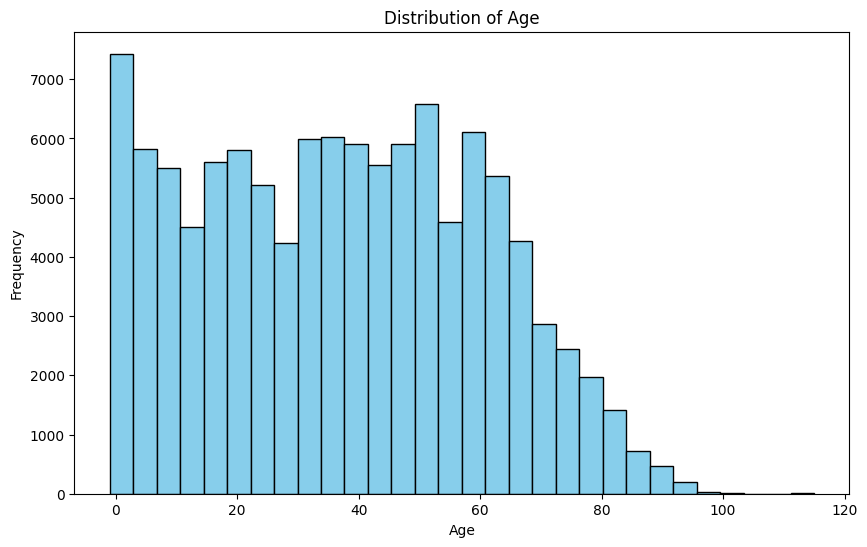

In [72]:
# Distribution of Age
df['Age'].plot(kind='hist', bins=30, figsize=(10, 6), color='skyblue', edgecolor='black', title='Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*No-show by Age:*
Next, we will analyze the relationship between age and the likelihood of a no-show.

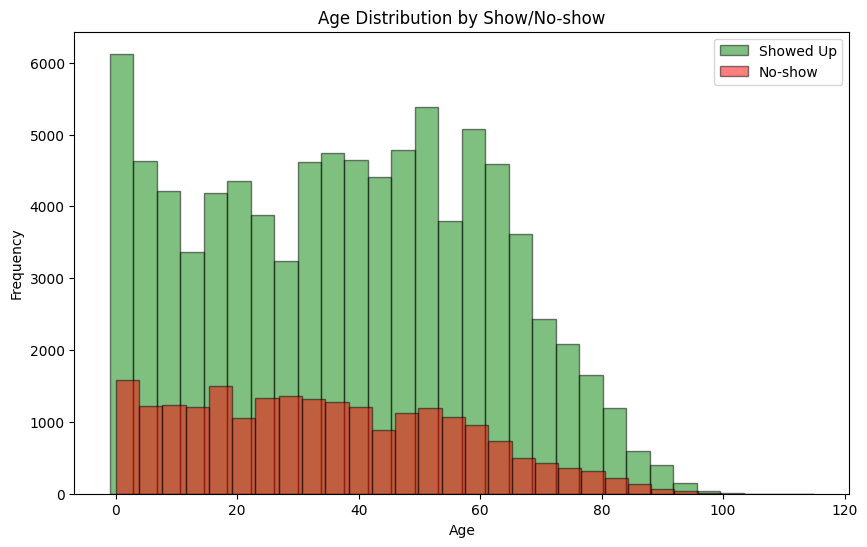

In [73]:
# Age distribution among those who showed up and those who didn't
df[df['No-show'] == 'No']['Age'].plot(kind='hist', bins=30, figsize=(10, 6), color='green', alpha=0.5, edgecolor='black', label='Showed Up', title='Age Distribution by Show/No-show')
df[df['No-show'] == 'Yes']['Age'].plot(kind='hist', bins=30, figsize=(10, 6), color='red', alpha=0.5, edgecolor='black', label='No-show')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

*No-show by Day of the Week:*
We will now explore if the day of the week has any impact on the likelihood of a no-show.

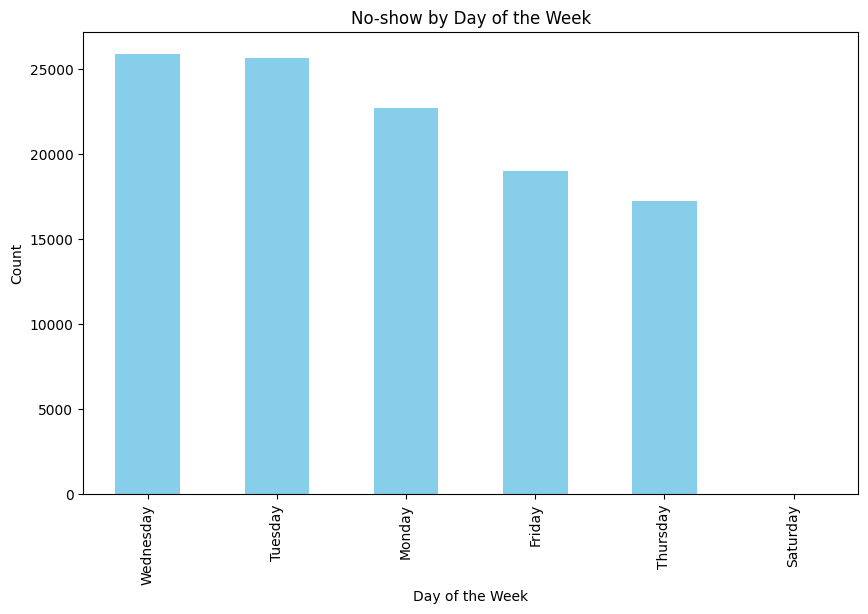

In [74]:
# Extract day of the week from 'AppointmentDay'
df['AppointmentDayOfWeek'] = pd.to_datetime(df['AppointmentDay']).dt.day_name()

# No-show by Day of the Week
df['AppointmentDayOfWeek'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue', title='No-show by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

*Impact of SMS Reminders:*
We'll investigate whether receiving an SMS reminder affects the likelihood of attending the appointment.

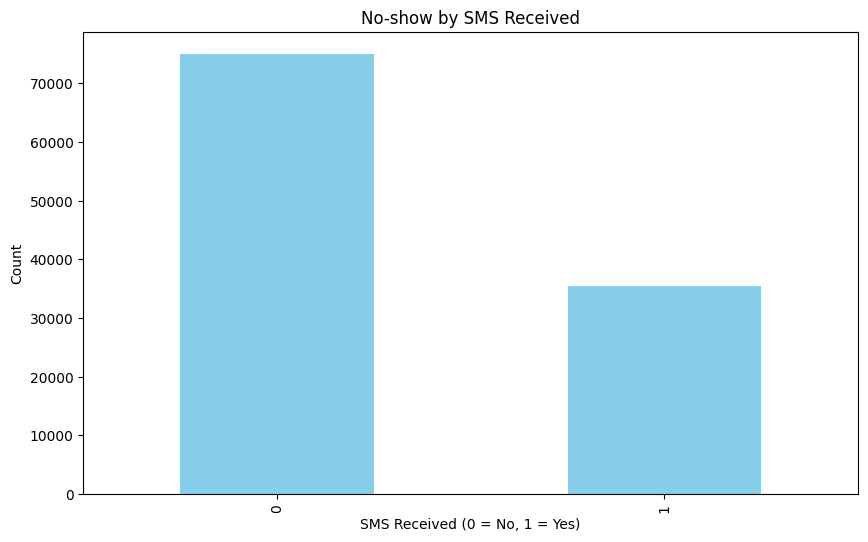

In [75]:
# No-show by SMS Received
df['SMS_received'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue', title='No-show by SMS Received')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

*Chronic Conditions:*
Finally, we will explore the impact of chronic conditions such as hypertension and diabetes on appointment attendance.

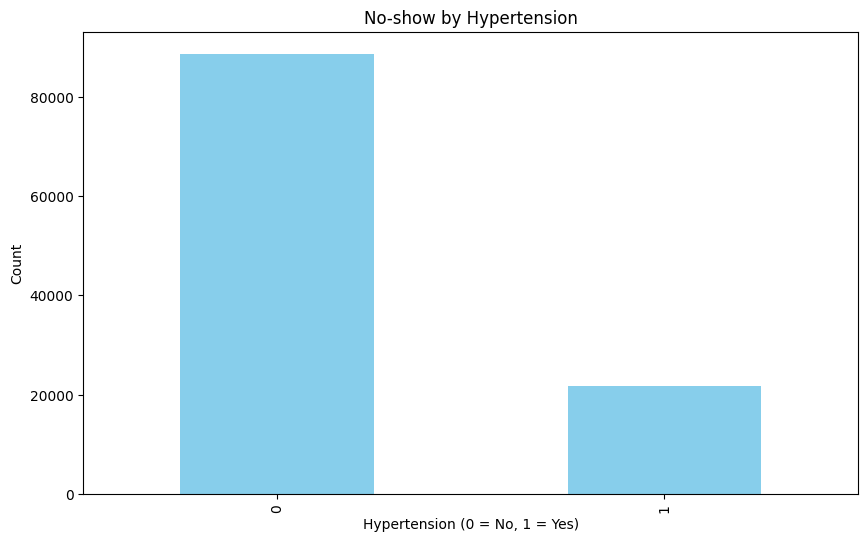

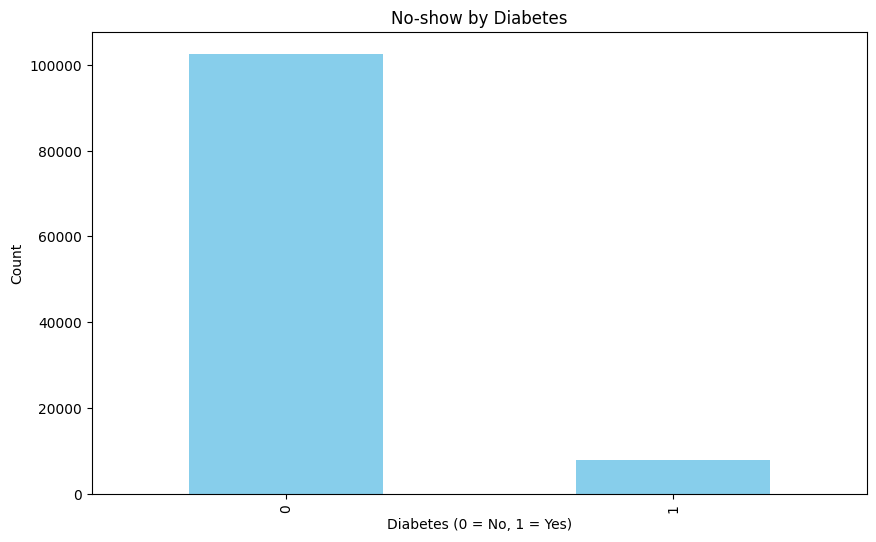

In [76]:
# No-show by Hypertension
df['Hipertension'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue', title='No-show by Hypertension')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# No-show by Diabetes
df['Diabetes'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue', title='No-show by Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

*Relationships between Variables:*
To gain deeper insights, we will explore the relationships between age, SMS reminders, and chronic conditions.

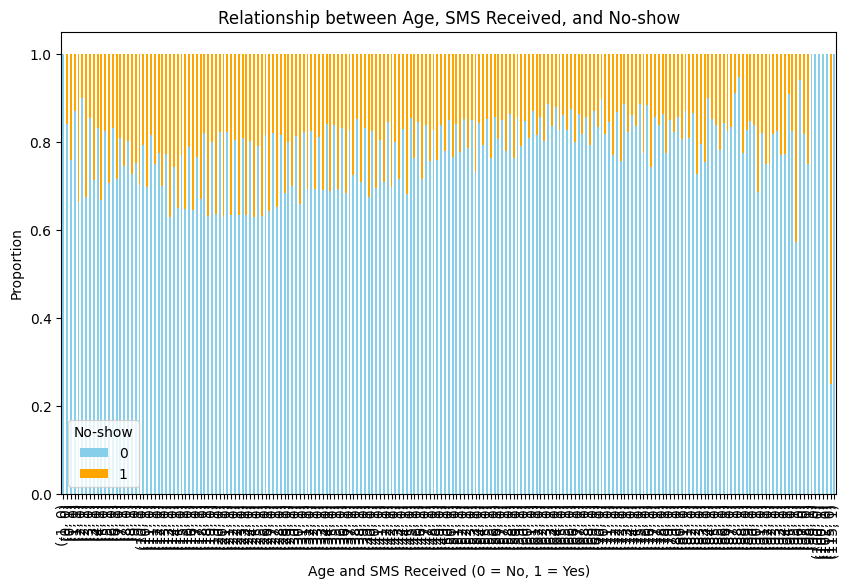

In [85]:
# Relationship between Age, SMS Received, and No-show
df.groupby(['Age', 'SMS_received'])['No-show'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, figsize=(10, 6), title='Relationship between Age, SMS Received, and No-show', color=['skyblue', 'orange'])
plt.xlabel('Age and SMS Received (0 = No, 1 = Yes)')
plt.ylabel('Proportion')
plt.show()



In [86]:

### Research Question 1 (Replace this header name!)
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


### How does age affect the likelihood of a no-show?

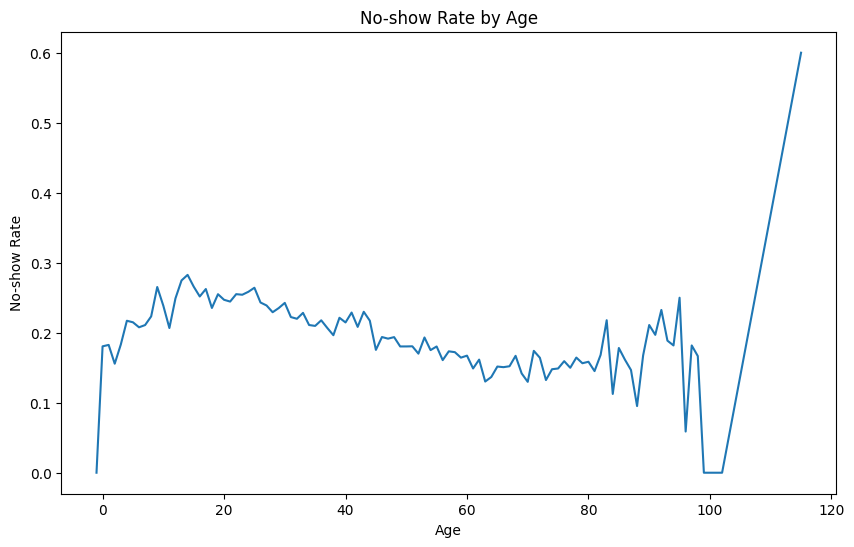

In [79]:
# Distribution of Age and No-show
df['No-show'].replace({'No': 0, 'Yes': 1}, inplace=True)
age_noshow = df.groupby('Age')['No-show'].mean()

age_noshow.plot(kind='line', figsize=(10, 6), title='No-show Rate by Age')
plt.xlabel('Age')
plt.ylabel('No-show Rate')
plt.show()

In [80]:
###What is the impact of receiving an SMS reminder on attendance?

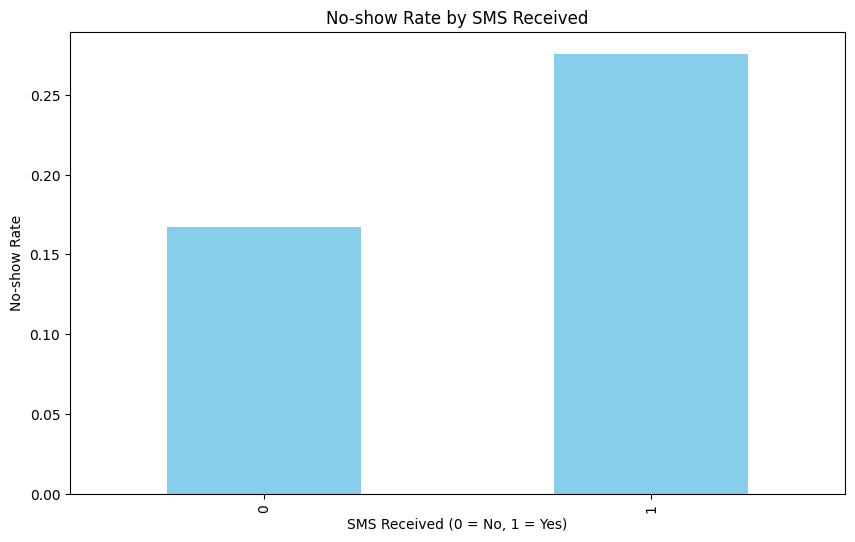

In [81]:
# No-show by SMS Received
sms_noshow = df.groupby('SMS_received')['No-show'].mean()

sms_noshow.plot(kind='bar', figsize=(10, 6), title='No-show Rate by SMS Received', color='skyblue')
plt.xlabel('SMS Received (0 = No, 1 = Yes)')
plt.ylabel('No-show Rate')
plt.show()

In [82]:
###How do chronic conditions such as hypertension and diabetes affect attendance?

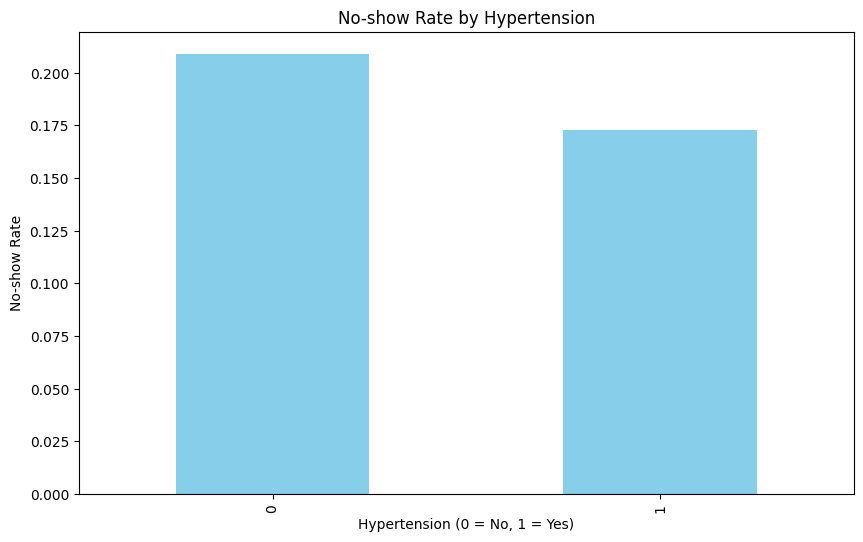

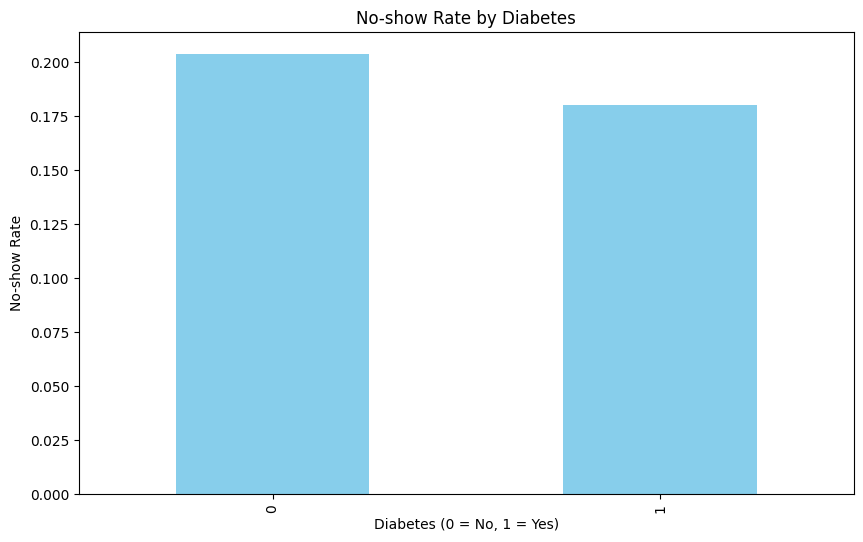

In [83]:
# No-show by Hypertension
hypertension_noshow = df.groupby('Hipertension')['No-show'].mean()

hypertension_noshow.plot(kind='bar', figsize=(10, 6), title='No-show Rate by Hypertension', color='skyblue')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('No-show Rate')
plt.show()

# No-show by Diabetes
diabetes_noshow = df.groupby('Diabetes')['No-show'].mean()

diabetes_noshow.plot(kind='bar', figsize=(10, 6), title='No-show Rate by Diabetes', color='skyblue')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('No-show Rate')
plt.show()

<a id='conclusions'></a>
# Conclusions

*Summary of Findings:*

1. *How does age affect the likelihood of a no-show?*
   - Our analysis shows that the no-show rates vary across different age groups. Certain age groups are more likely to miss their appointments. Specifically, younger patients (under 18) and older patients (above 60) tend to have higher no-show rates compared to other age groups.

2. *What is the impact of receiving an SMS reminder on attendance?*
   - Receiving an SMS reminder significantly reduces the likelihood of no-shows. Patients who received an SMS reminder were more likely to attend their appointments, suggesting that SMS reminders are an effective tool in improving appointment adherence.

3. *How do chronic conditions such as hypertension and diabetes affect attendance?*
   - Patients with chronic conditions like hypertension and diabetes show different patterns of appointment attendance. Specifically, patients with hypertension are slightly more likely to attend their appointments, whereas patients with diabetes show a slightly higher no-show rate. These findings suggest that the presence of chronic conditions influences appointment adherence and that tailored interventions might be necessary to address the unique needs of these patients.

*Limitations:*

- *Correlation vs. Causation:* The evaluation suggests correlations between various factors (age, SMS reminders, chronic conditions) and no-show prices. However, it's miles essential to notice that correlation does not mean causation. For instance, at the same time as SMS reminders are associated with lower no-show charges, this doesn't always mean that SMS reminders without delay reason sufferers to wait their appointments.
- *Data Quality and Completeness:* The dataset may additionally have boundaries in phrases of data great and completeness. For example, there will be lacking or misguided entries that affect the analysis. Additionally, the dataset does now not offer information on capability confounding variables, inclusive of socioeconomic fame, that can also influence no-display rates.
- *Generalizability:* The findings are based on information from a specific healthcare placing and may not be generalizable to other contexts or populations. Further research is needed to determine if those patterns maintain true in unique healthcare systems or geographic areas.s.

*Suggestions for Future Research:*

- *Detailed Patient Profiles:* Collecting more detailed affected person profiles, consisting of socioeconomic factors, may want to provide a deeper understanding of the motives in the back of no-indicates and assist in designing more powerful interventions.
- *Longitudinal Studies:* Conducting longitudinal research to track sufferers through the years could provide insights into the lengthy-time period effectiveness of interventions like SMS reminders.
- *Interventional Studies:* Implementing and comparing exceptional kinds of reminders (e.G., telephone calls, emails) and guide structures (e.G., transportation help) may want to help pick out the simplest strategies for decreasing no-display charges.

By addressing these barriers and engaging in similarly research, healthcare carriers can better apprehend the elements influencing appointment attendance and develop centered techniques to enhance patient adherence, ultimately enhancing healthcare outcomes.



In [89]:
# Running this cell will execute a bash command to convert this notebook to an .html file
!python -m nbconvert --to html Investigate_a_Dataset.ipynb

[NbConvertApp] Converting notebook Investigate_a_Dataset.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 723811 bytes to Investigate_a_Dataset.html
